In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import os
from scipy.optimize import curve_fit
import warnings
from scipy.signal import savgol_filter
import statistics as stats

## Graphing the Data

File scope_21.csv not found


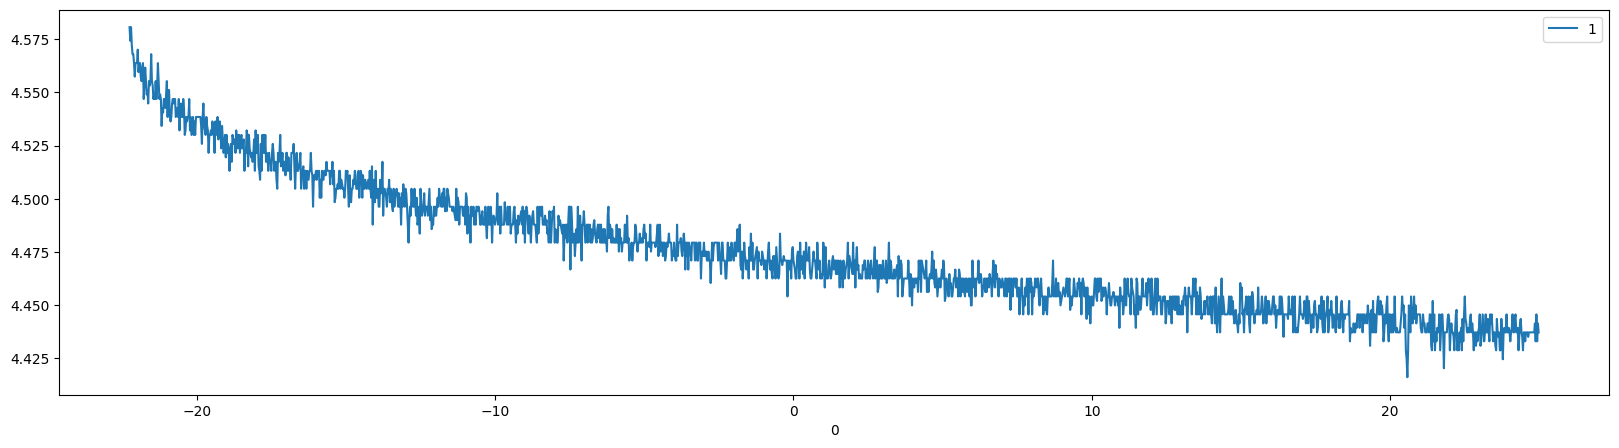

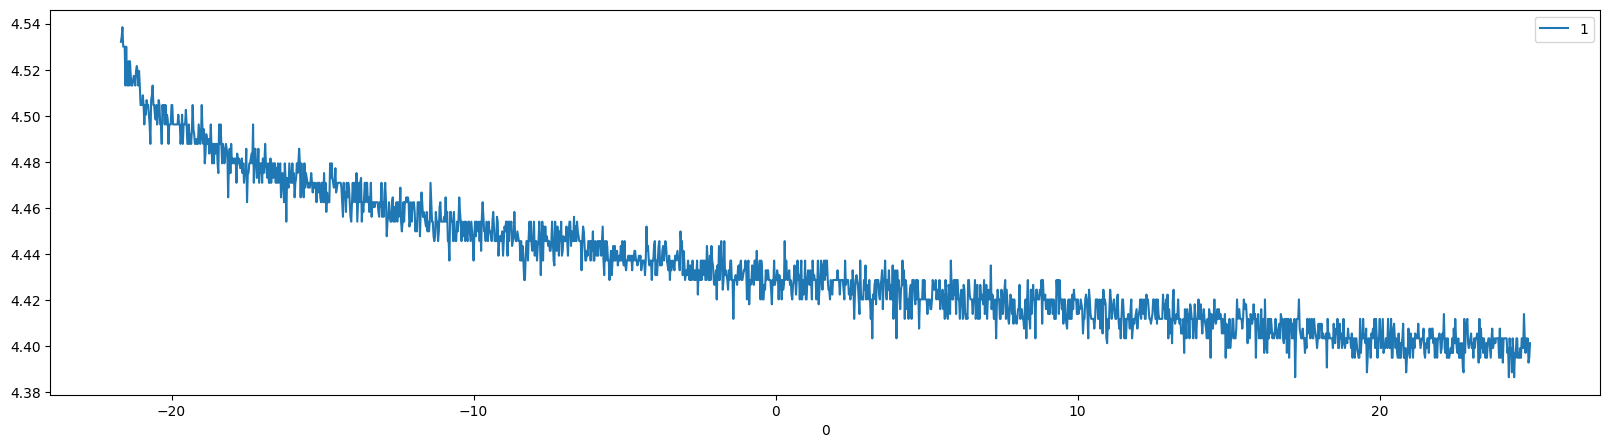

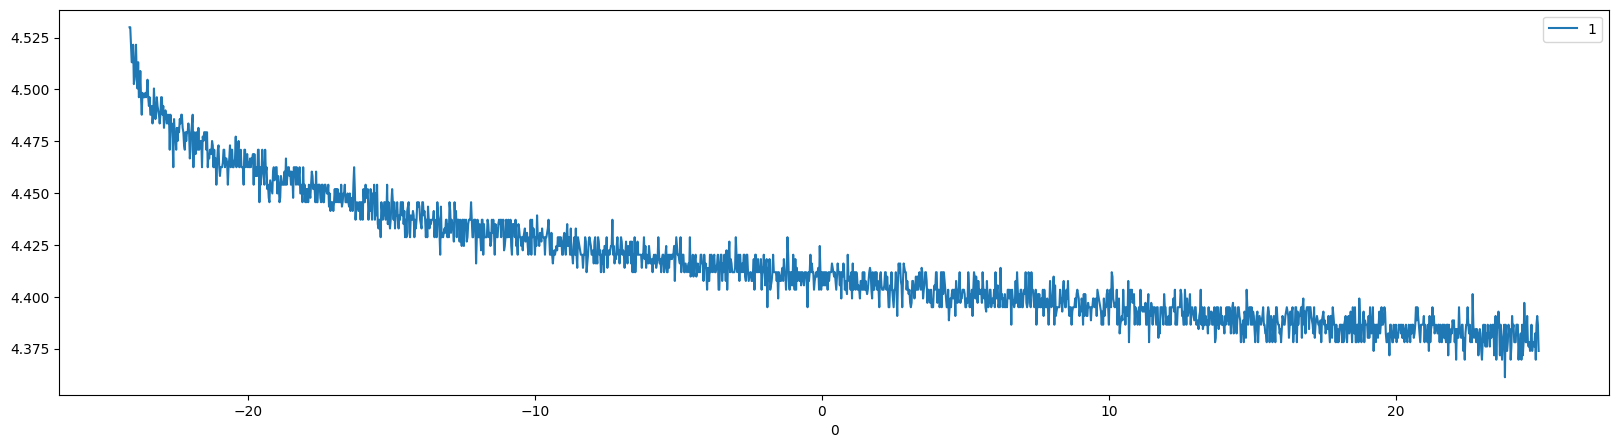

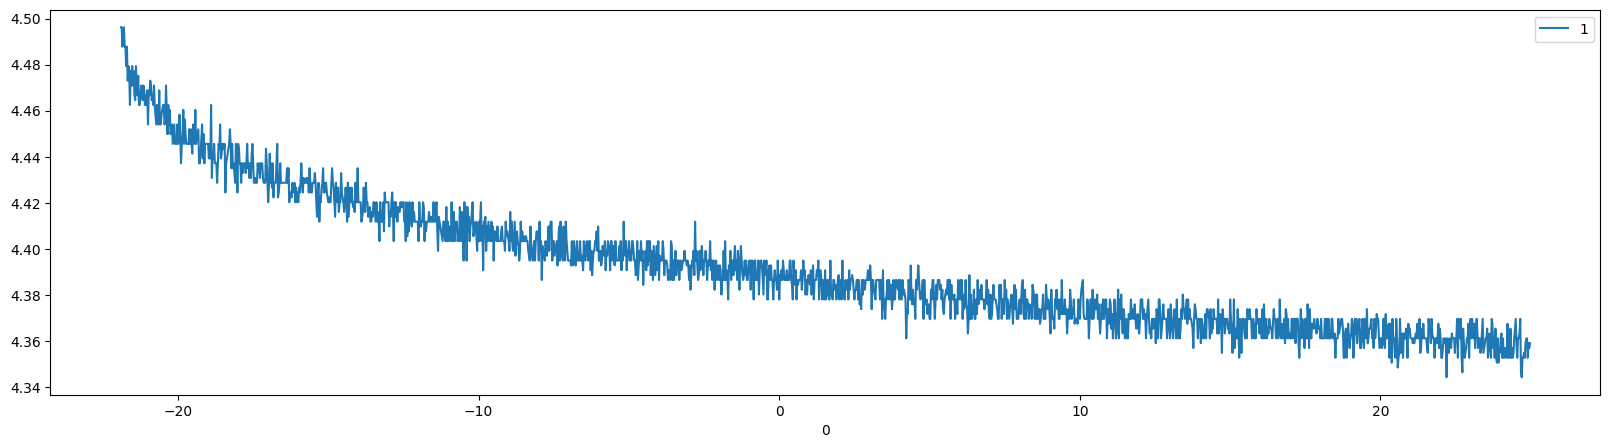

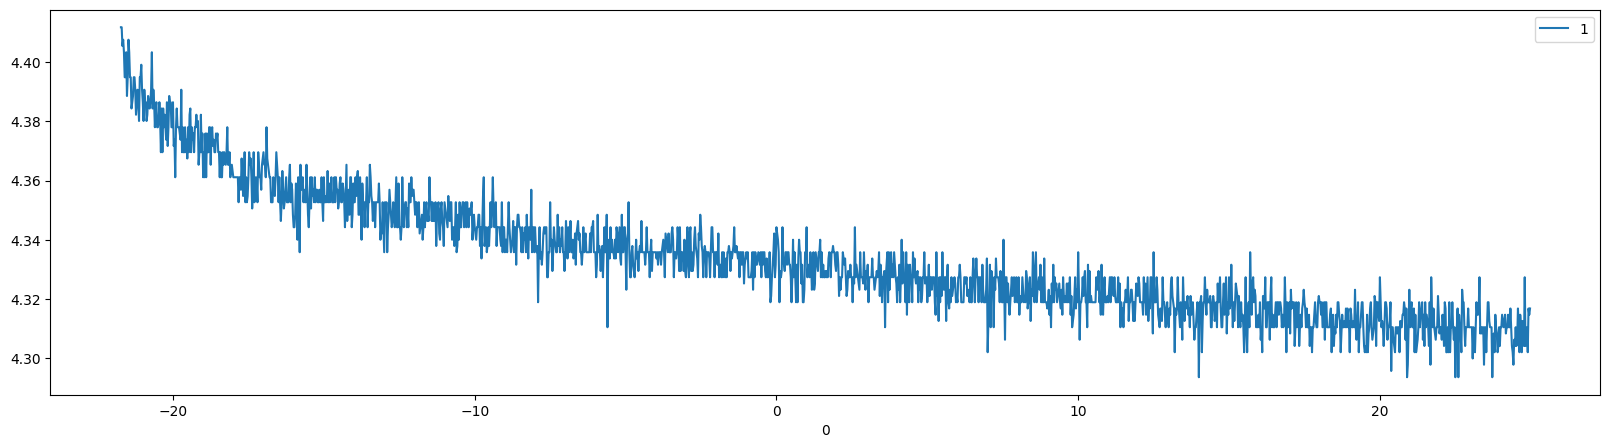

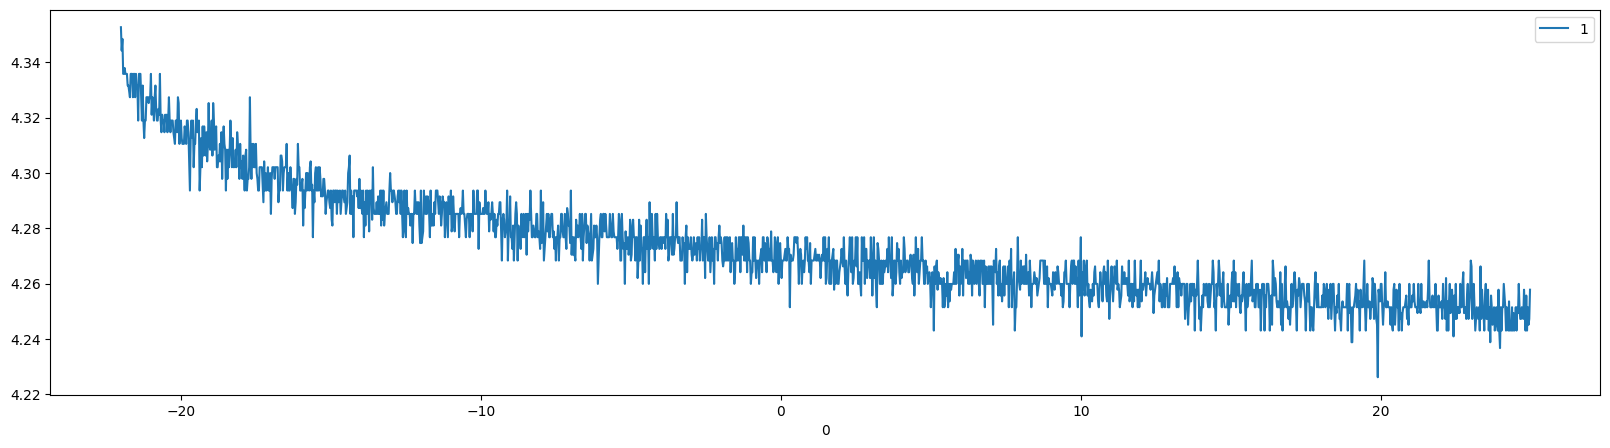

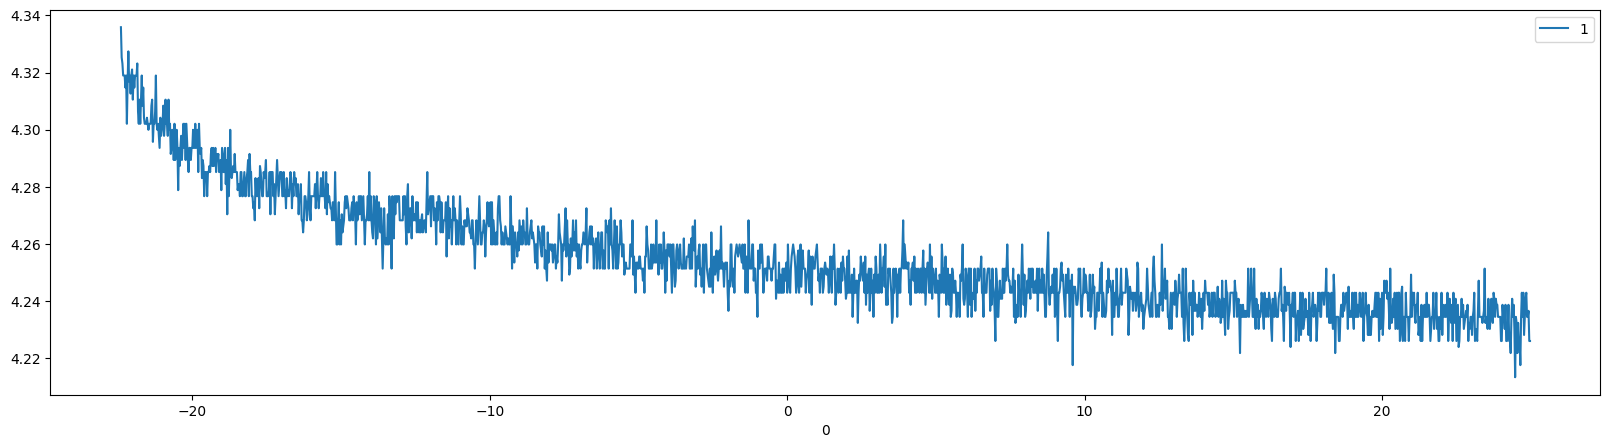

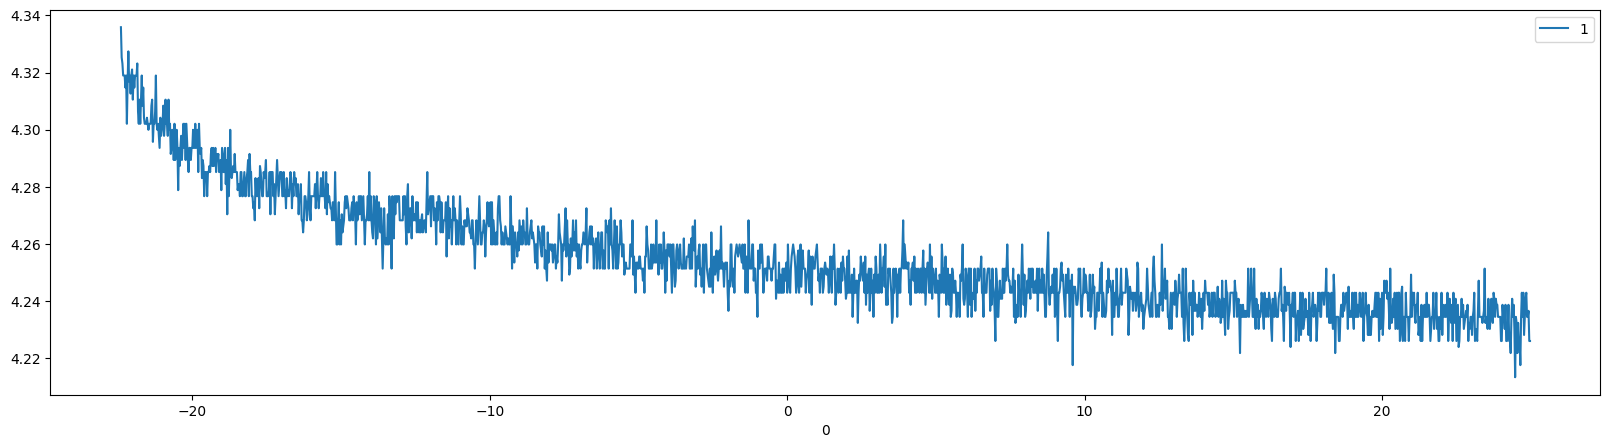

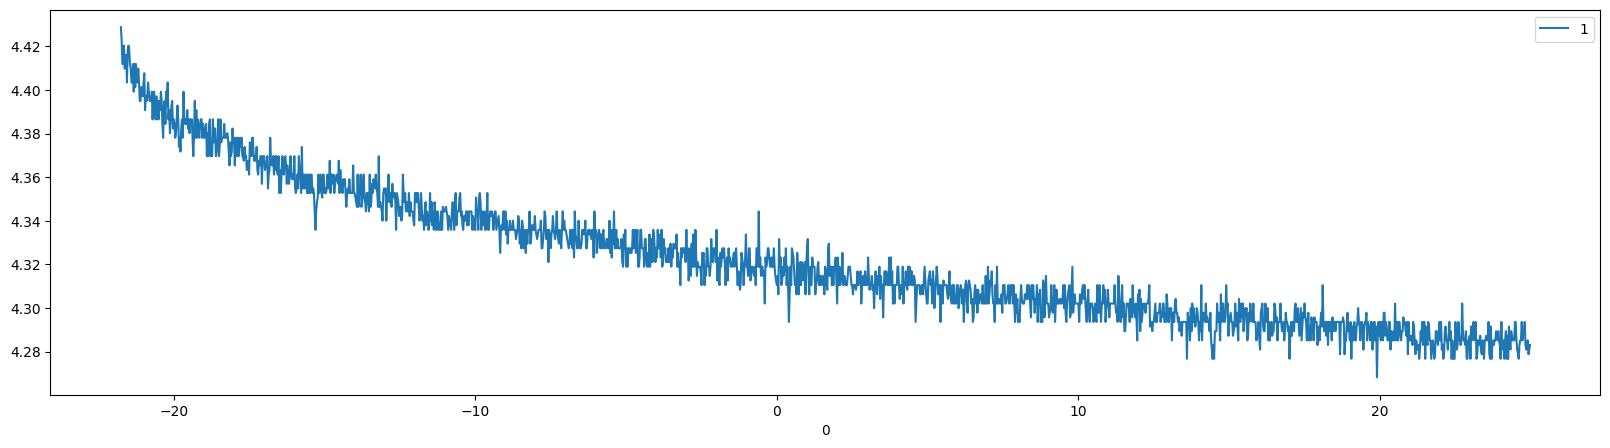

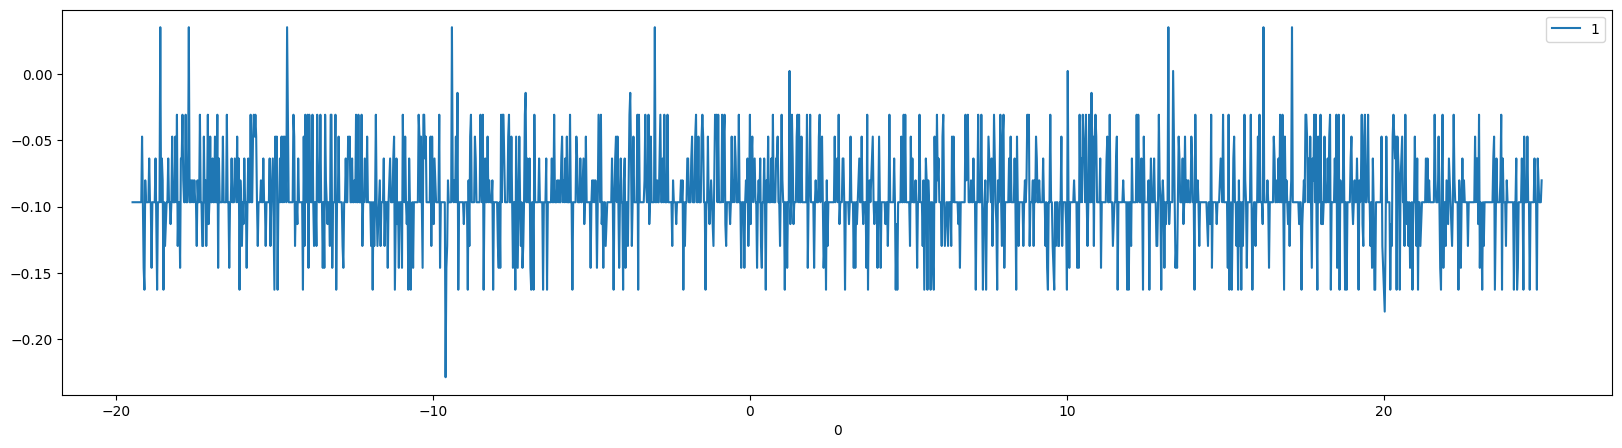

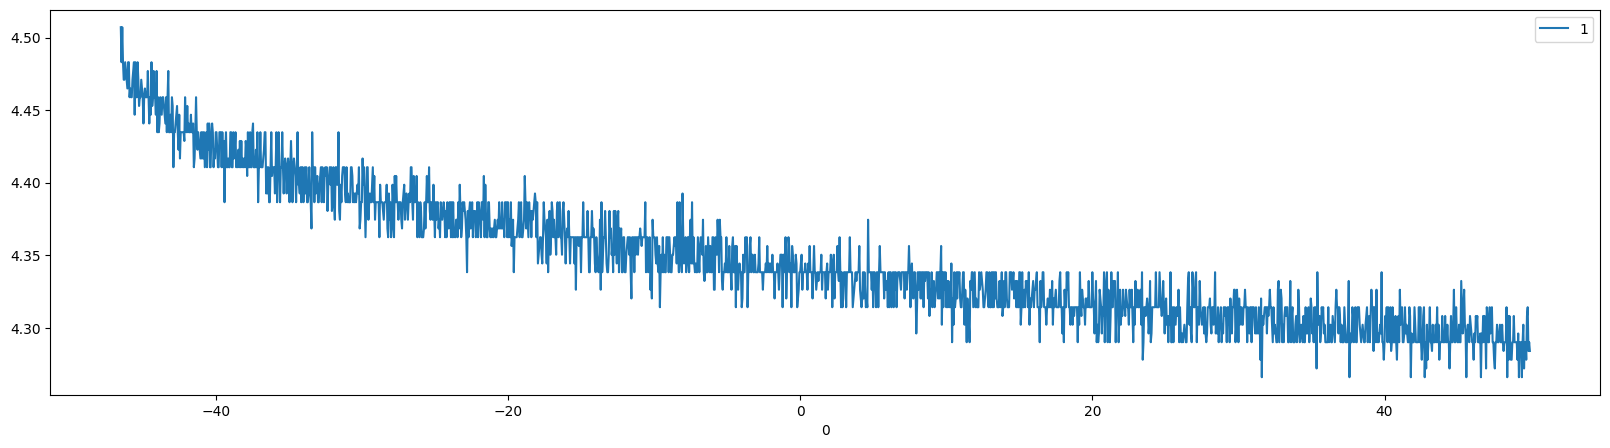

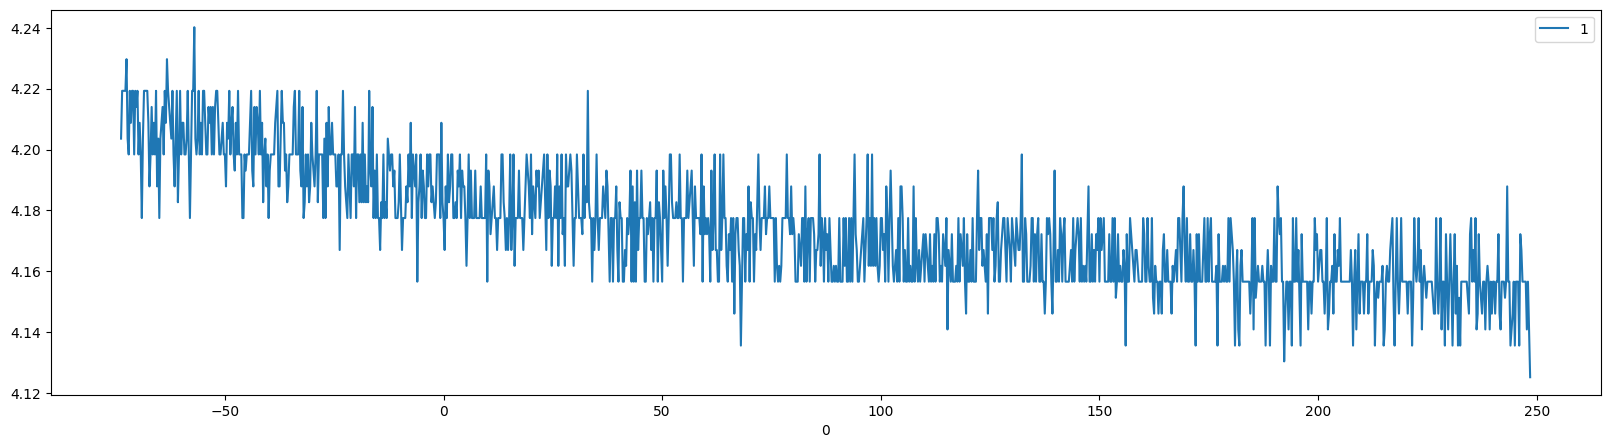

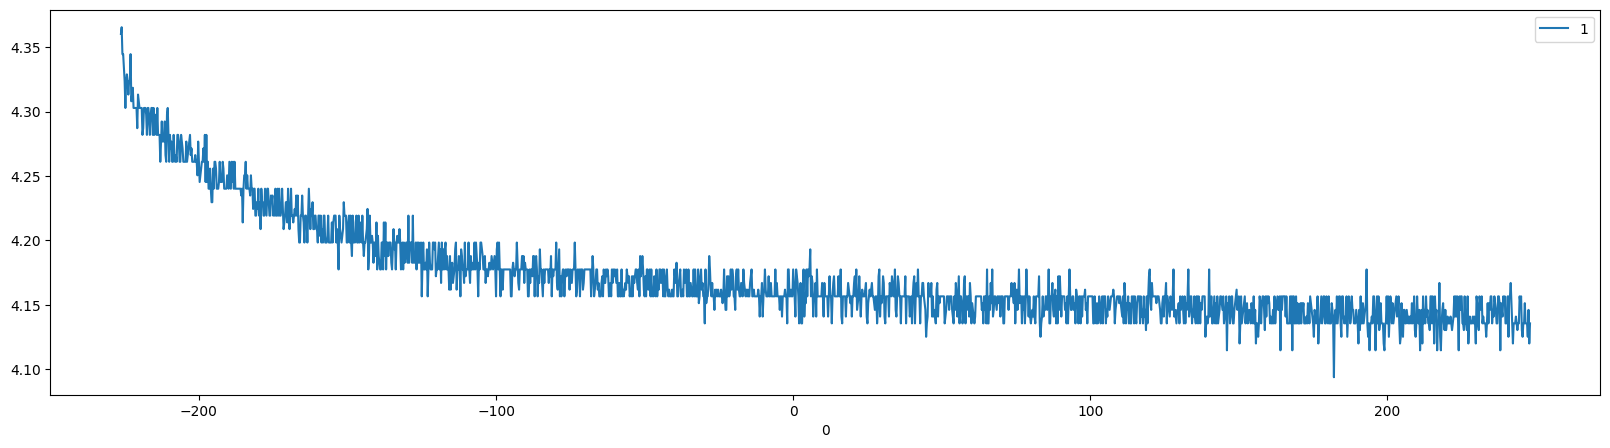

In [5]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#User Input
smallest_number=11 #Assuming the data has format, scope_#.csv, where # increases following every data set
largest_number=24 
prefix="scope_"
folder="" #Folder with data
file_type=".csv" 
cooling_time=["Title 1", "Title 2", "etc"] #Labels for the scope traces


#Initialization
data_array=[]
num_array=[]
titles=[]

#Data Interpretation
for i in range(smallest_number,largest_number + 1):
    filename = folder + prefix + str(i) + file_type 
    #Finds file
    try:
        data = pd.read_csv(filename, sep = ",").to_numpy()
        data = pd.DataFrame(data[1:]).dropna()
        titles.append(i)
        for j in range(len(data[0])):
             if(type(data[0][j])==str):
                data[0][j]=float(data[0][j].split('E')[0])*(10**float(data[0][j].split('E')[1]))
             if(type(data[1][j])==str):
                data[1][j]=float(data[1][j].split('E')[0])*(10**float(data[1][j].split('E')[1]))

        y=0
        for j in range(len(data[0])-1):
            x = data[1][j+1]-data[1][j]
            if(x>y):
                y = x
                num = j + 2

        data_array.append(np.array(data[1]))
        data[num:len(data)].plot(0,figsize=(20,5))
        num_array.append(num)
    except FileNotFoundError: 
        print("File  "+ prefix + str(i) + file_type + " not found")
        
    

## Savgol Filter

The Savgol Filter cleans up the data and reduces noise to give a smoother curve of the experimental data. 

/var/folders/_k/7vkx25w17_s1md3k9zt3c2_r0000gn/T/ipykernel_981/2757332810.py:32: RuntimeWarning: overflow encountered in exp
  return(a * np.exp(-b * x) + c)


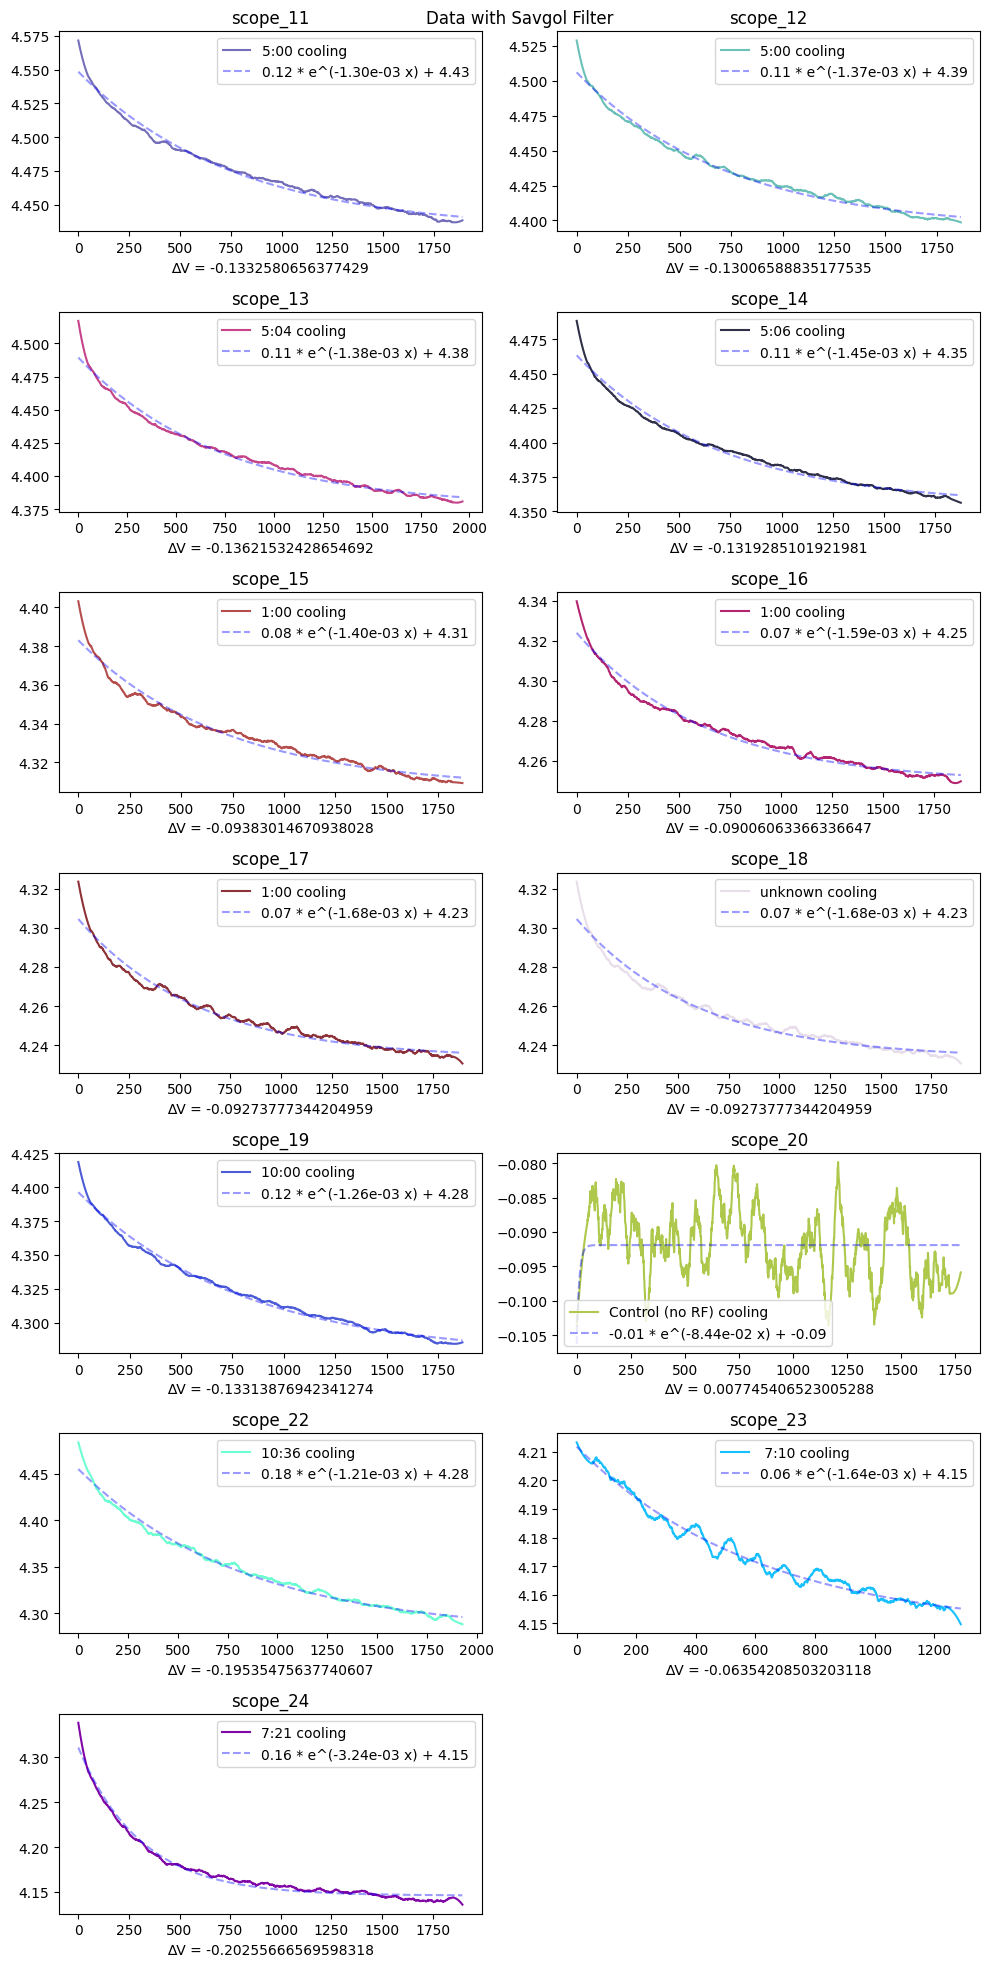

In [13]:
#Initialization
x_values=[]
y_values=[]
first_values=[]
last_values=[]
delta_v=[]

#Savgol Filter
for i in range(0,len(data_array)):
    y_values.append(savgol_filter(data_array[i][num_array[i]:], 100, 2))
    x_values.append(list(range(0,len(data_array[i])-num_array[i])))

#Figure Creation - via Matteo Scarponi
plots = len(data_array)
columns = 2
position = range(1,plots+1)

rows = plots // columns

if plots % columns !=0:
    rows+=1

fig = plt.figure(1,figsize=(10,20))

plt.title("Data with Savgol Filter")
plt.xlabel("# of Points")
plt.ylabel("Volts (V)")
plt.axis("off")

#Curve Fitting Function
def func(x,a,b,c):
    return(a * np.exp(-b * x) + c)

#Plotting
for i in range(plots):
    ax=fig.add_subplot(rows,columns,position[i]) #via  Matteo Scarponi
    ax.plot(x_values[i],y_values[i],c=(np.random.random(),np.random.random(),np.random.random()),label=cooling_time[i] + " cooling") #via Zach
    ax.set_title("scope_" + str(titles[i]))
    ax.set(xlabel="∆V = " + str(-1*(y_values[i][0]-y_values[i][-1])))
    last_values.append(y_values[i][-1])
    first_values.append(y_values[i][0])
    delta_v.append(-1*(y_values[i][0]-y_values[i][-1]))
   #Curve Fitting
    param, param_cov = curve_fit(func, x_values[i], y_values[i])
    ax.plot(x_values[i], func(np.array(np.float_(x_values[i])),param[0],param[1],param[2]), '--', color ='blue', 
            label =str(round(param[0],2))+" * e^(-" + str("{:.2e}".format(param[1])) + " x) + " + str(round(param[2],2)),alpha=.4)
    
    
    ax.legend()


last_values.remove(last_values[9])
first_values.remove(first_values[9])
delta_v.remove(delta_v[9])
plt.tight_layout()
plt.show()

## Analysis for 5:00 cooling
Ending values are measured at point 1750 

In [17]:
last_values=[]
delta_v=[]

for i in range(0,4):
    last_values.append(y_values[i][1750])
    delta_v.append(first_values[i]-last_values[i])

In [18]:
print("Starting values: ")

print("Average: " + str(stats.mean(first_values[0:4])) + " +- " + str(stats.stdev(first_values[0:4])) + " volts\n")

print("Ending values: ")

print("Average: " + str(stats.mean(last_values[0:4])) + " +- " + str(stats.stdev(last_values[0:4])) + " volts\n")

print("∆V: ")

print("Average: " + str(stats.mean(delta_v[0:4])) + " +- " + str(stats.stdev(delta_v[0:4])) + " volts\n")


Starting values: 
Average: 4.526391855445544 +- 0.03458501856510595 volts

Ending values: 
Average: 4.396217013700548 +- 0.03311400510017593 volts

∆V: 
Average: 0.1301748417449955 +- 0.0030988890250452923 volts

